<a href="https://colab.research.google.com/github/Hira-Nav/DataScienceProjects/blob/main/Deep_Reinforcement_Learning_Q_Learning_For_Tube_Navigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Reinforcement Learning


# Basic Q-Learning For Tube Navigation

### Task: To work out the shortest path starting from a random given station, ending at Holborn.

__1. Define the environment and problem to be solved:__

        1. Presenting environment in grid format
        2. Netwrok diagram (states = nodes)
__2. Define a state transition function and the reward function__

        1. Define states, actions & R-matrix
        2. Define Q-matrix
__3. Comparing random policy vs epsilon greedy policy__

        1. Random policy - Run an episode
        2. Epsilon greedy policy - Run an episode
__4. Run the Q-learning algorithm - Single Episode__

__5. Experiment: Run many epsiodes until convergence__

        1. Resest environemnt and Q-matrix
        2. Run untl convergence
            1. Comparing alpha
            2. Comparing gamma
            3. Comparing epsilon
__6. Experiment: Running best params model__

        1. Resest environemnt and Q-matrix
        2. Run episodes with best params
            1. Experiment 1
            2. Experiment 2
    

In [ ]:
#Import relevant libraries

import sys
import matplotlib.pyplot as plt
import matplotlib.style
import pandas as pd
#import plotting
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1 - Define the environment and problem to be solved:

See below tube map, we will be using a section of the tube map in Zone 1, and construct a R-matrix to satisfy the below conditions

*   First we will set up a NaN matrix (out of bound areas for agent)
*   Each State (Station) = 0 points
*   Station closed = -100 points (negative reward)
*   Finish goal at 'Holborn' = 100 points



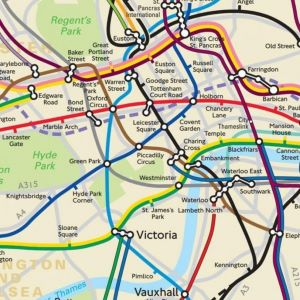

###  1.1. Presenting environment with possible paths in a grid format

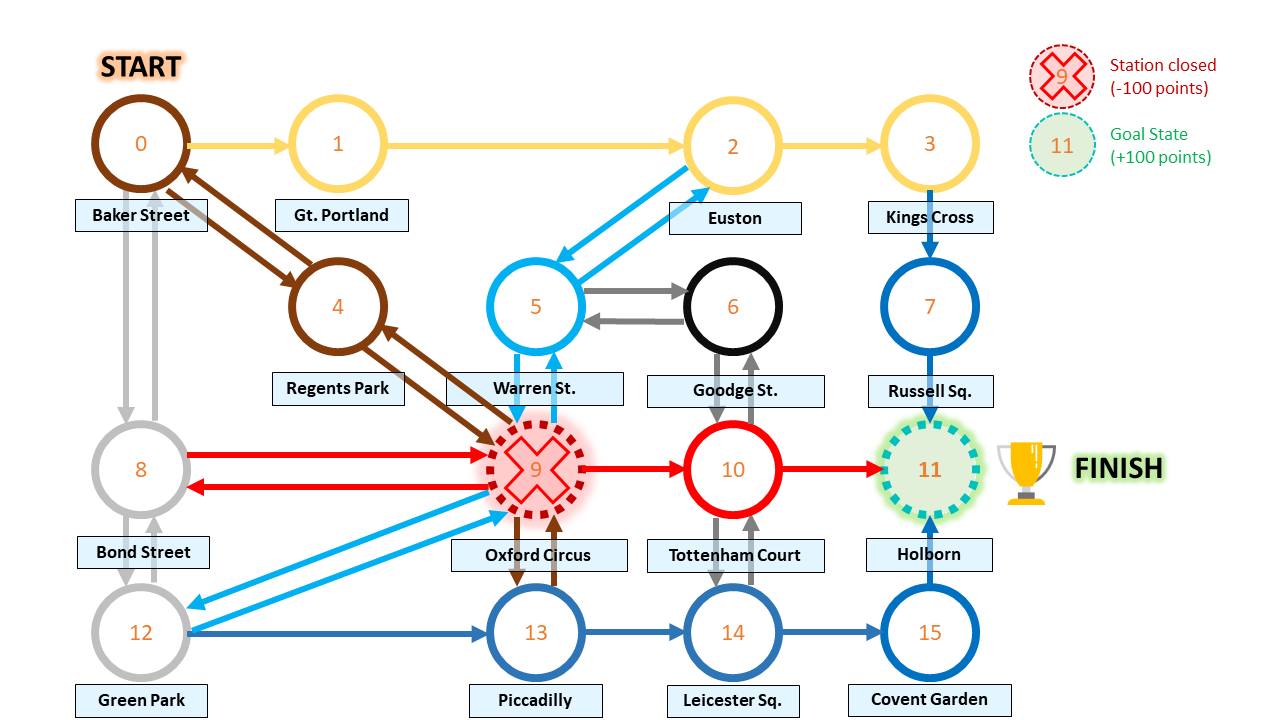

In [ ]:
from IPython.display import Image
Image("Presentation1.png",width = 800, height = 400)


### 1.2. Network diagram where states (stations) are associated as nodes

## 2 - Define state transition function and the reward function



### 2.1. Define states, actions & R-matrix

In [ ]:
## Define States

State = {'Baker_Street':0, 'Great_Portland_Street':1, 'Euston':2, 'Kings_Cross':3,
         'Regents_Park':4, 'Warren_Street':5, 'Goodge_Street':6, 'Russell_Square':7,
         'Bond_Street':8, 'Oxford_Circus':9, 'Tottenham_Court_Road':10, 'Holborn':11,
         'Green_Park':12, 'Piccadilly_Circus':13, 'Leicester_Square':14, 'Covent Garden':15}

goal_state = State["Holborn"]
## Define Actions
Stations = list(State.items()) #We will apply this
S = list(State.values())

A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Initialize R matrix with np.nan in all cells
R =  np.array([[np.nan for a in A] for s in S])

#Environment has 36 possible actions
possible_actions = [(0,1), (0,4), (4,0), (0,8), (8,0), (1,2), (2,3), (3,7), (7,11), (4,9), (9,4), (8,9), (9,8), (9,10), (10,11),
                    (11,11), (8,12), (12,8), (12,13), (13,14), (14,15), (15,11),
                    (2,5), (5,2), (5,9), (9,5), (5,6), (6,5), (6,10), (10,6), (9,12), (12,9), (9,13), (13,9), (10,14), (14,10)]

for s,a in possible_actions:
    if a == 11:
        R[s,a] = 100 #FINISH at Holborn, reward=100
    elif a == 9:
        R[s,a] = -100 #Oxford Circus close, no through trains
    else:
        R[s,a] = 0

print('R matrix: \n\n{}'.format(R))



R matrix: 

[[  nan    0.   nan   nan    0.   nan   nan   nan    0.   nan   nan   nan
    nan   nan   nan   nan]
 [  nan   nan    0.   nan   nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan]
 [  nan   nan   nan    0.   nan    0.   nan   nan   nan   nan   nan   nan
    nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan    0.   nan   nan   nan   nan
    nan   nan   nan   nan]
 [   0.   nan   nan   nan   nan   nan   nan   nan   nan -100.   nan   nan
    nan   nan   nan   nan]
 [  nan   nan    0.   nan   nan   nan    0.   nan   nan -100.   nan   nan
    nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan    0.   nan   nan   nan   nan    0.   nan
    nan   nan   nan   nan]
 [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan  100.
    nan   nan   nan   nan]
 [   0.   nan   nan   nan   nan   nan   nan   nan   nan -100.   nan   nan
     0.   nan   nan   nan]
 [  nan   nan   nan   nan    0.    0.   nan   nan    0.   nan    0.   nan
     

### 2.2. Define Q-Matrix (Agents accumulated knowledge of environment)

The Q matrix indicates the agent's valuation for the given state and action pair. In other words, the agent's expected return for taking the given action in the given state.

When the agent knows the number of possible states and actions already, the Q matrix is the same size as the R matrix. The indices are the same, ie row 0 indicates state A etc in the Q matrix as well as the R matrix.

We initialize the Q matrix with zeros. Right now, the agent doesn't know anything about the value of any given action in any given state, and it also doesn't know which actions are possible in which state yet.

In [ ]:
Q = np.zeros(R.shape)

print('Q matrix: \n\n{}'.format(Q))

Q matrix: 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 3 - Comparing random policy vs epsilon greedy policy (Initial performance tests)

### 3.1. Random policy - Run an episode

Run the cell below to run a single episode.

Text(0, 0.5, 'Reward')

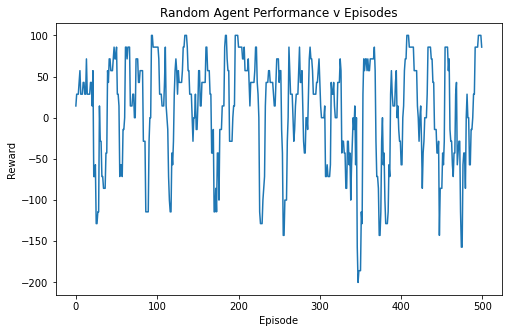

In [ ]:
#define lists
episode_list = []
reward_list = []
ave_reward_list = []

for episode in range(500):

    #s = 0
    s = np.random.choice(len(S)) # Select random starting point

    total_reward = 0
    for timestep in range(500):
        # Action selection
        available_actions = np.where(~np.isnan(R[s]))[0]
        a = np.random.choice(available_actions)   # select ransom best available action

        # Environment updating
        r = R[s,a]
        s_old = s
        s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.

        # Environment rewards
        total_reward = (total_reward+ float(r))

        if S[s] == goal_state:
            break


    episode_list.append(episode)
    reward_list.append(total_reward)
    ave_reward_list.append(sum(reward_list[-7:])/7)

cum_reward_list = np.cumsum(reward_list)

# Q Agent Plot
plt.figure(figsize=(8,5))
plt.plot(episode_list,ave_reward_list)
plt.title('Random Agent Performance v Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')


Text(0, 0.5, 'Reward')

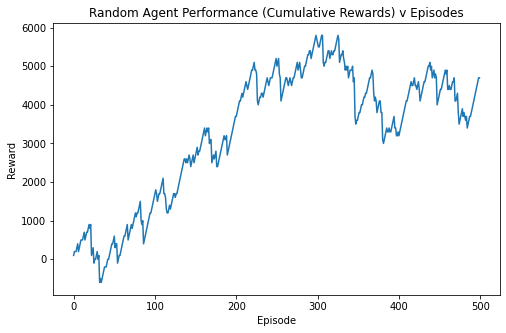

In [ ]:
# Q Agent Cumulative rewards plot
plt.figure(figsize=(8,5))
plt.plot(episode_list,cum_reward_list)
plt.title('Random Agent Performance (Cumulative Rewards) v Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')


### 3.2. Epsilon greedy policy (with decay) - Run an episode

Run the cell below to run a single episode.

Text(0, 0.5, 'Reward')

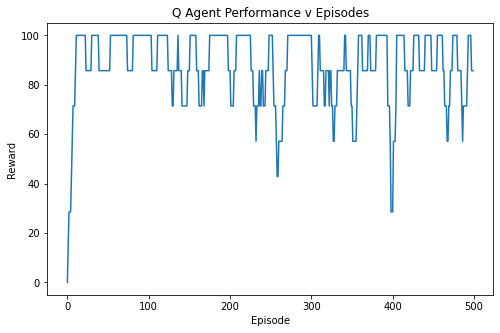

In [ ]:
#define lists
episode_list = []
reward_list = []
ave_reward_list = []

# Learning params
alpha = 0.9
gamma = 0.8
epsilon = 0.9
epsilon_decay = 0.99995

Q = np.zeros(R.shape) #Reset the Q-matrix
orginal_epsilon = epsilon


for episode in range(500):

    #s = 0
    s = np.random.choice(len(S)) # Select random starting point

    total_reward = 0
    for timestep in range(500):
        # Action selection
        available_actions = np.where(~np.isnan(R[s]))[0]
        q_values = [Q[s,a] for a in available_actions]
        best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
        best_actions_q_values = [Q[s,x] for x in best_actions]


        # Epsilon-greedy
        if np.random.uniform() > epsilon:
            a = np.random.choice(available_actions)
        else:
            a = np.random.choice(best_actions)

        # Environment updating
        r = R[s,a]
        s_old = s
        s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.

        # Q value updating
        q_updated = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
        Q[s_old,a] = q_updated

        total_reward = (total_reward + float(r))

        if S[s] == goal_state:
            break


    #Update epsilon value (after decay)
    epsilon = epsilon * epsilon_decay

    episode_list.append(episode)
    reward_list.append(total_reward)
    ave_reward_list.append(sum(reward_list[-7:])/7)

cum_reward_list = np.cumsum(reward_list)

# Q Agent Plot
plt.figure(figsize=(8,5))
plt.plot(episode_list,ave_reward_list)
plt.title('Q Agent Performance v Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')

Text(0, 0.5, 'Reward')

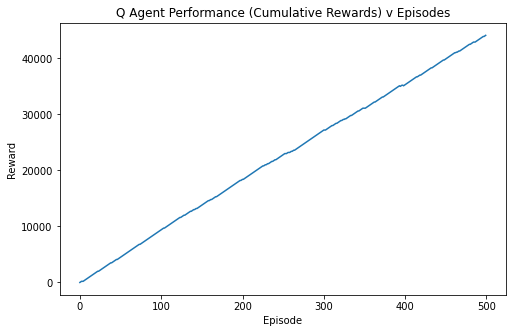

In [ ]:
# Q Agent Cumulative rewards plot
plt.figure(figsize=(8,5))
plt.plot(episode_list,cum_reward_list)
plt.title('Q Agent Performance (Cumulative Rewards) v Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')


## 4 - Run the Q-learning algorithm - Single Episode

In [ ]:
# Learning params
alpha = 0.9
gamma = 0.8
epsilon = 0.9
epsilon_decay = 0.99999

#Reset Q matrix
Q = np.zeros(R.shape)

#s = 0
s = np.random.choice(len(S)) # Select random starting point

print("Starting state is '{}'".format(S[s]))

for i in range(500):
    # Action selection
    available_actions = np.where(~np.isnan(R[s]))[0]
    print("Available actions from state '{}' are: {}".format(S[s], [A[x] for x in available_actions]))

    q_values = [Q[s,a] for a in available_actions]
    print('Q values for those actions from current state: {}'.format(q_values))

    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
    best_actions_q_values = [Q[s,x] for x in best_actions]

    if len(best_actions) > 1:
        print('Detected multiple actions with identical Q values. Agent will randomly select one of these.')
        print('Our best available actions from here are: {} with current q values: {}'.format(
            [A[x] for x in best_actions], best_actions_q_values))

    # Epsilon-greedy
    if np.random.uniform() > epsilon:
        a = np.random.choice(available_actions)
        print("Selecting random action '{}' with current Q value {}".format(A[a], Q[s,a]))

        #Update epsilon value (after decay)
        epsilon = epsilon * epsilon_decay
    else:
        a = np.random.choice(best_actions)
        print("Selecting greedy action '{}' with current Q value {}".format(A[a], Q[s,a]))


    # Environment updating
    r = R[s,a]
    print("Reward for taking action '{}' from state '{}': {}".format(A[a], S[s], r))

    s_old = s
    s = a # here, the transition function is deterministic. Next state corresponds simply to the action taken.
    print("After taking action '{}' from state '{}', new state is '{}'".format(A[a], S[s_old], S[s]))

    # Q value updating
    q_updated = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])
    Q[s_old,a] = q_updated

    print("Q value update: " \
          "Q({},{}) = Q({},{}) + alpha*(r({},{}) + gamma*max(Q[{},:]) - Q[{},{}]) ".format(
        S[s_old], A[a], S[s_old], A[a], S[s_old], A[a], S[s],S[s_old], A[a]))

    print("Q matrix update: " \
          "Q({},{}) = {} + {}*({} + {}*{} - {}) = {}".format(
        S[s_old], A[a], Q[s_old,a].round(0), alpha, r, gamma, np.max(Q[s,:]).round(0),
        Q[s_old,a].round(0), q_updated))

    print('Q matrix updated: \n\n {}'.format(Q.round(0)))

    if S[s] == goal_state:
        print("Goal state '{}' reached. Ending episode.".format(goal_state))
        break



Starting state is '14'
Available actions from state '14' are: [10, 15]
Q values for those actions from current state: [0.0, 0.0]
Detected multiple actions with identical Q values. Agent will randomly select one of these.
Our best available actions from here are: [10, 15] with current q values: [0.0, 0.0]
Selecting greedy action '15' with current Q value 0.0
Reward for taking action '15' from state '14': 0.0
After taking action '15' from state '14', new state is '15'
Q value update: Q(14,15) = Q(14,15) + alpha*(r(14,15) + gamma*max(Q[15,:]) - Q[14,15]) 
Q matrix update: Q(14,15) = 0.0 + 0.9*(0.0 + 0.8*0.0 - 0.0) = 0.0
Q matrix updated: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

## 5 - Experiment: Run many epsidoes until convergence

Run many episodes until Q matrix converges to final values

* Deterministic environment, the output is determined by the set conditions that are not random i.e take the same action from the same state in a deterministic environment. Our starting point is Baker Street this is set (i.e. we are using this approach in our model)

* Stochastic environment, decisions made are given probability distributions that are random i.e. take different actions from the same state



### 5.1. Reset environment and Q-matrix

In [ ]:

import numpy as np
#Define the environment

goal_state = State["Holborn"]

## Define State (Train Station Locations)
State = {'Baker_Street':0, 'Great_Portland_Street':1, 'Euston':2, 'Kings_Cross':3,
         'Regents_Park':4, 'Warren_Street':5, 'Goodge_Street':6, 'Russell_Square':7,
         'Bond_Street':8, 'Oxford_Circus':9, 'Tottenham_Court_Road':10, 'Holborn':11,
         'Green_Park':12, 'Piccadilly_Circus':13, 'Leicester_Square':14, 'Covent Garden':15}

## Define Actions
S = list(State.values())
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Initialize R matrix with np.nan in all cells
R =  np.array([[np.nan for a in A] for s in S])

possible_actions = [(0,1), (0,4), (4,0), (0,8), (8,0), (1,2), (2,3), (3,7), (7,11), (4,9), (9,4), (8,9), (9,8), (9,10), (10,11),
                    (11,11), (8,12), (12,8), (12,13), (13,14), (14,15), (15,11),
                    (2,5), (5,2), (5,9), (9,5), (5,6), (6,5), (6,10), (10,6), (9,12), (12,9), (9,13), (13,9), (10,14), (14,10)]

for s,a in possible_actions:
    if a == 11:
        R[s,a] = 100 #FINISH at Holborn, reward=100
    elif a == 9:
        R[s,a] = -100 #Delay at Oxford circus, avoid route
    else:
        R[s,a] = 0

#print('R matrix: \n\n{}'.format(R))

# Q matrix
Q = np.zeros(R.shape)

### 5.2. Run until convergence (different params and policies)

In [ ]:
#define lists
episode_list = []
reward_list = []
steps_list = []

data_list = []
data = pd.DataFrame(columns = ['episode','alpha','gamma','epsilon','ave_reward','ave_steps'])

episodes = 200
total_epochs = 0    #https://learning.oreilly.com/library/view/hands-on-q-learning-with/9781789345803/4f1558d0-a403-44f7-a250-44a74ddbb2dc.xhtml

#Q-learning params (hyperparams)
alpha_list = [0.01,0.1,0.5,0.9]     # Learning Rate
gamma_list = [0.01,0.1,0.5,0.8,0.9]       # Discount factor
epsilon_list = [0.1,0.5,0.75,0.9]       # Exploration rate
#epsilon_decay = 1
Q = np.zeros(R.shape)

for alpha in alpha_list:
    for gamma in gamma_list:
        for epsilon in epsilon_list:
            Q = np.zeros(R.shape) #Reset the Q-matrix
            orginal_epsilon = epsilon

            for episode in range(episodes):
                epochs = 0
                total_reward = 0
              #  s = 0   #Starting state Baker Street - Print("Starting state is '{}'".format(S[s]))
                s = np.random.choice(len(S))   # start random station

                for timestep in range(500):
                    # Action selection
                    available_actions = np.where(~np.isnan(R[s]))[0]
                    q_values = [Q[s,a] for a in available_actions]
                    best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
                    best_actions_q_values = [Q[s,x] for x in best_actions]

                    # Epsilon-greedy
                    if np.random.uniform() > epsilon:
                        a = np.random.choice(available_actions)
                    else:
                        a = np.random.choice(best_actions)

                    # Epsilon greedy decay
                    if epsilon >=0.5:
                        epsilon=epsilon*0.99999
                    else:
                        epsilon=epsilon*0.99995

                    # Environment updating
                    r = R[s,a]
                    s_old = s
                    s = a

                    # Q value updating  (Bellman equation)
                    Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])  # np.argmax() vs np.max()
                    total_reward = (total_reward+ float(r))

                    # Q value updating
                    if S[s] == goal_state:
                        #print("Goal state '{}' reached. Ending episode.".format(goal_state))
                        break

                    epochs += 1
                    total_epochs += epochs

                episode_list.append(episode)
                reward_list.append(total_reward)
                steps_list.append(epochs)

                #Grid Search#
                data_list = [episode,alpha,gamma,orginal_epsilon,sum(reward_list[-7:])/7,epochs]  #Rolling average lst 7 episodes (week6 labs)
                temporary_df = pd.DataFrame([data_list], columns=['episode','alpha', 'gamma', 'epsilon', 'ave_reward', 'ave_steps'])
                data = data.append(temporary_df, ignore_index=True)


                #print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))

In [ ]:
data=data.astype(float)


In [ ]:
data.dtypes

episode       float64
alpha         float64
gamma         float64
epsilon       float64
ave_reward    float64
ave_steps     float64
dtype: object

In [ ]:
### View grouped dataframe for average rewards (Rolling average of last 7 epsiodes)
from IPython.display import display

data_group = data.drop(columns=['episode']).groupby(['alpha','gamma','epsilon']).mean()
display(data_group)

ave_reward  ave_steps
alpha gamma epsilon                       
0.1   0.1   0.00      16.785714      5.800
            0.10      29.928571      5.070
            0.75      89.285714      2.555
            0.90      97.000000      2.345
            1.00      98.500000      2.520
      0.5   0.00      23.714286      5.705
            0.10      32.785714      5.225
            0.75      86.428571      3.150
            0.90      93.357143      2.650
            1.00      97.214286      2.520
      0.8   0.00       9.571429      6.230
            0.10      31.714286      5.395
            0.75      90.714286      2.640
            0.90      96.500000      2.215
            1.00      99.000000      1.915
      0.9   0.00      -2.142857      6.310
            0.10      19.285714      6.275
            0.75      90.357143      2.520
            0.90      98.000000      2.110
            1.00      97.500000      2.320
0.5   0.1   0.00       3.000000      7.165
            0.10      30.928571      5.385
            0.75      92.571429      2.295
            0.90      97.000000      2.270
            1.00      97.500000      2.180
      0.5   0.00       9.571429      5.970
            0.10      44.428571      4.900
            0.75      91.000000      2.735
            0.90      96.000000      2.265
            1.00      97.500000      2.330
      0.8   0.00      21.500000      5.205
            0.10      50.214286      4.525
            0.75      91.928571      2.080
            0.90      95.357143      2.135
            1.00      98.000000      2.035
      0.9   0.00      17.214286      5.915
            0.10      49.285714      4.725
            0.75      91.500000      2.735
            0.90      92.000000      1.920
            1.00      97.500000      2.155
0.9   0.1   0.00       3.714286      7.195
            0.10      34.785714      5.430
            0.75      94.500000      2.315
            0.90      93.500000      2.475
            1.00      98.500000      2.545
      0.5   0.00      12.000000      6.585
            0.10      50.142857      4.755
            0.75      91.857143      2.720
            0.90      97.000000      2.155
            1.00      98.000000      2.395
      0.8   0.00      16.142857      5.985
            0.10      28.642857      5.670
            0.75      87.357143      2.215
            0.90      97.357143      2.225
            1.00      97.000000      2.655
      0.9   0.00       4.500000      6.460
            0.10      31.214286      5.170
            0.75      78.000000      2.550
            0.90      95.285714      2.275
            1.00      93.357143      2.145

### 5.3. Line chart comparing alpha = [0.01, 0.1, 0.5, 0.9], gamma = 0.8 and epsilon = 0.9

[Text(0.5, 1.0, 'Comparing Alpha - Average Rewards (gamma=0.8, epsilon=0.9)')]

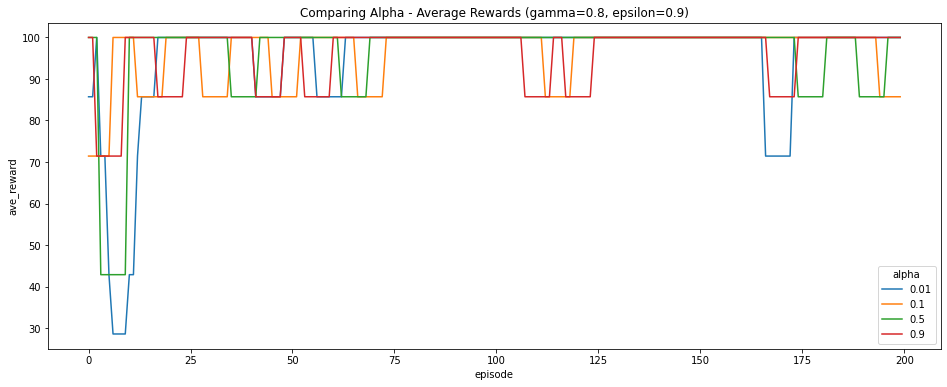

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,6))
data_alpha = data[(data['gamma']==0.8) & (data['epsilon']==0.9)]
sns.lineplot(data=data_alpha, x="episode", y ="ave_reward", hue = "alpha",ci=None,
             palette = "tab10").set(title='Comparing Alpha - Average Rewards (gamma=0.8, epsilon=0.9)')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Comparing Alpha - Cumulative Rewards (gamma=0.8, epsilon=0.9)')]

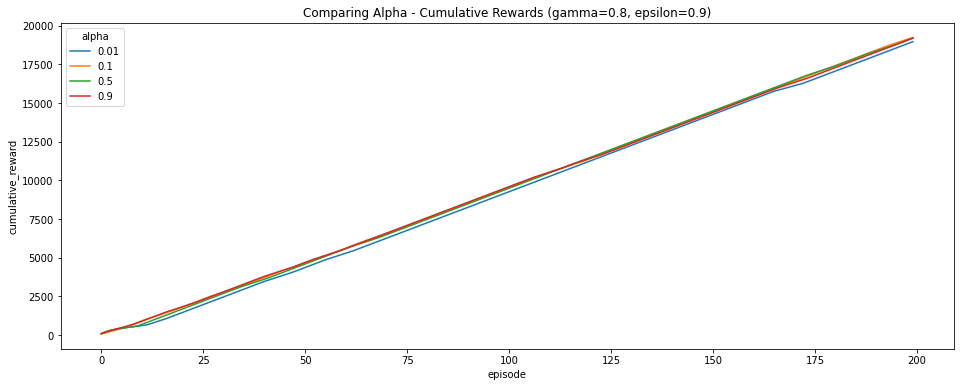

In [ ]:
plt.figure(figsize=(16,6))
data_alpha['cumulative_reward']= data.groupby(['alpha','gamma','epsilon'])['ave_reward'].apply(lambda x: x.cumsum())
sns.lineplot(data=data_alpha, x="episode", y ="cumulative_reward", hue = "alpha", ci=None,
             palette = "tab10").set(title='Comparing Alpha - Cumulative Rewards (gamma=0.8, epsilon=0.9)')



### 5.4. Line chart comparing gamma = [0.01, 0.1, 0.5, 0.8, 0.9], alpha = 0.9, epsilon = 0.9

[Text(0.5, 1.0, 'Comparing Gamma - Average Rewards (alpha=0.9, epsilon=0.9)')]

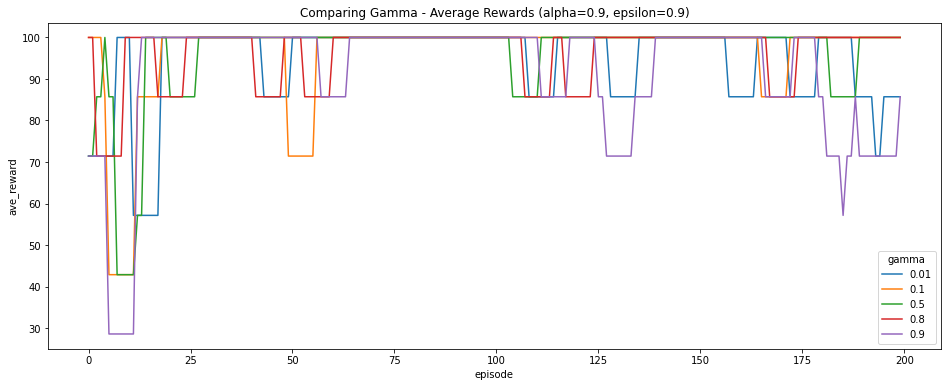

In [ ]:
plt.figure(figsize=(16,6))
data_gamma = data[(data['alpha']==0.9) & (data['epsilon']==0.9)]
sns.lineplot(data=data_gamma, x="episode", y ="ave_reward", hue = "gamma",ci=None,
             palette = "tab10").set(title='Comparing Gamma - Average Rewards (alpha=0.9, epsilon=0.9)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 1.0, 'Comparing Gamma - Cumulative Rewards (alpha=0.9, epsilon=0.9)')]

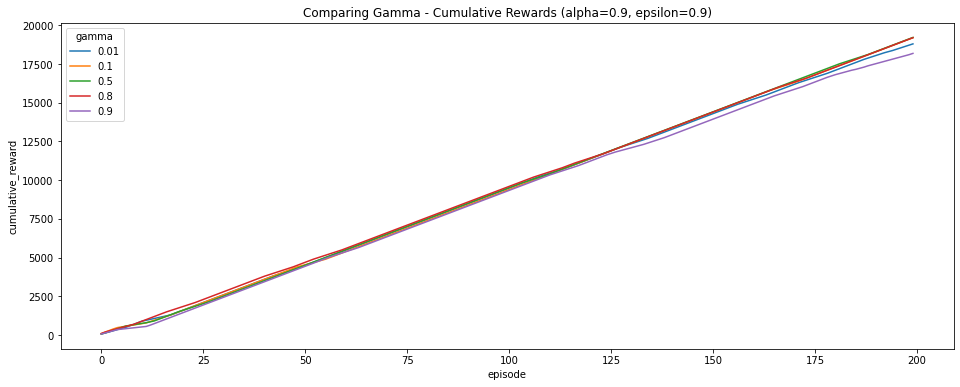

In [ ]:
plt.figure(figsize=(16,6))
data_gamma['cumulative_reward']= data.groupby(['alpha','gamma','epsilon'])['ave_reward'].apply(lambda x: x.cumsum())
sns.lineplot(data=data_gamma, x="episode", y ="cumulative_reward", hue = "gamma", ci=None,
             palette = "tab10").set(title='Comparing Gamma - Cumulative Rewards (alpha=0.9, epsilon=0.9)')



### 5.5. Line chart comparing epsilon [0.1,0.5,0.75,0.9], alpha = 0.9 and gamma = 0.8

- Epsilon-greedy policy (e=1): We should see convergance to max reward of 100 points

- Random-policy(e=0): We should see a more random line chart, with some peaks of max rewards and troughs negative rewards


[Text(0.5, 1.0, 'Comparing Epsilon - Average Rewards (alpha=0.9, gamma=0.8)')]

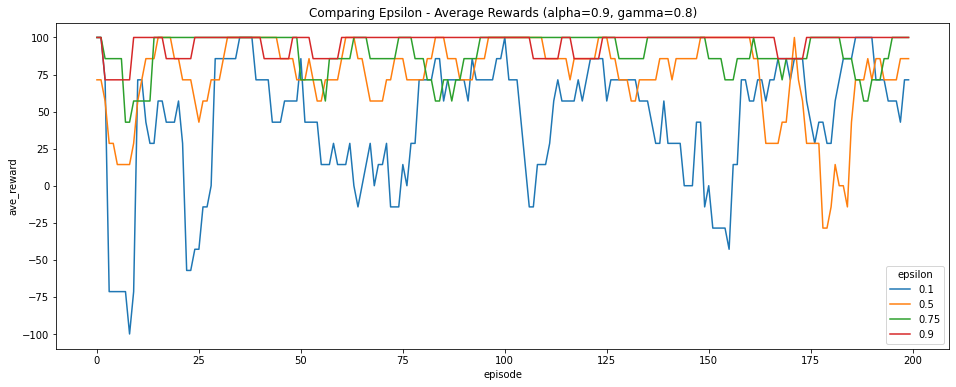

In [ ]:
plt.figure(figsize=(16,6))
data_epsilon = data[(data['alpha']==0.9) & (data['gamma']==0.8)]
sns.lineplot(data=data_epsilon, x="episode", y ="ave_reward", hue = "epsilon",ci=None,
             palette = "tab10").set(title='Comparing Epsilon - Average Rewards (alpha=0.9, gamma=0.8)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[Text(0.5, 1.0, 'Comparing Epsilon - Cumulative Rewards (alpha=0.9, gamma=0.8)')]

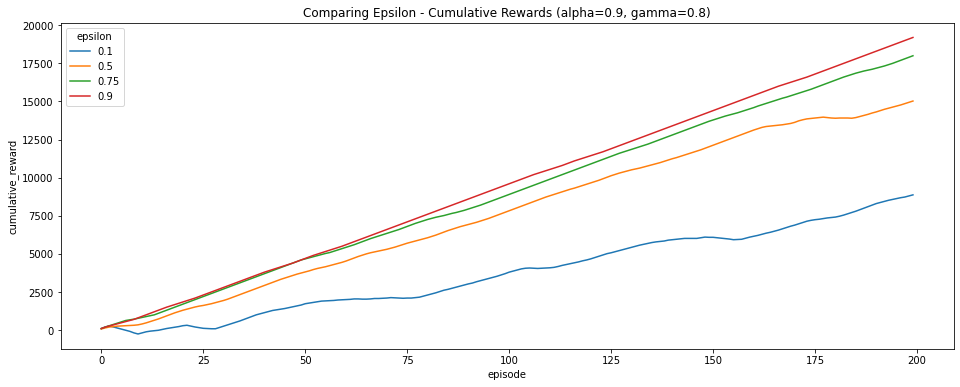

In [ ]:
#Cumulative chart

plt.figure(figsize=(16,6))
data_epsilon['cumulative_reward']= data.groupby(['alpha','gamma','epsilon'])['ave_reward'].apply(lambda x: x.cumsum())
sns.lineplot(data=data_epsilon, x="episode", y ="cumulative_reward", hue = "epsilon", ci=None,
             palette = "tab10").set(title='Comparing Epsilon - Cumulative Rewards (alpha=0.9, gamma=0.8)')

## 6 - Experiment running best params model

### 6.1. Reset environment and Q-matrix

In [ ]:
#Reset environment and Q-matrix

import numpy as np
#Define the environment

goal_state = State["Holborn"]

## Define State (Train Station Locations)
State = {'Baker_Street':0, 'Great_Portland_Street':1, 'Euston':2, 'Kings_Cross':3,
         'Regents_Park':4, 'Warren_Street':5, 'Goodge_Street':6, 'Russell_Square':7,
         'Bond_Street':8, 'Oxford_Circus':9, 'Tottenham_Court_Road':10, 'Holborn':11,
         'Green_Park':12, 'Piccadilly_Circus':13, 'Leicester_Square':14, 'Covent Garden':15}

## Define Actions
S = list(State.values())
A = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Initialize R matrix with np.nan in all cells
R =  np.array([[np.nan for a in A] for s in S])

possible_actions = [(0,1), (0,4), (4,0), (0,8), (8,0), (1,2), (2,3), (3,7), (7,11), (4,9), (9,4), (8,9), (9,8), (9,10), (10,11),
                    (11,11), (8,12), (12,8), (12,13), (13,14), (14,15), (15,11),
                    (2,5), (5,2), (5,9), (9,5), (5,6), (6,5), (6,10), (10,6), (9,12), (12,9), (9,13), (13,9), (10,14), (14,10)]

for s,a in possible_actions:
    if a == 11:
        R[s,a] = 100 #FINISH at Holborn, reward=100
    elif a == 9:
        R[s,a] = -100 #Delay at Oxford circus, avoid route
    else:
        R[s,a] = 0

#print('R matrix: \n\n{}'.format(R))

# Q matrix
Q = np.zeros(R.shape)

### 6.2. Run episodes with Best Params

In [ ]:
episodes = 500

#Q-learning params (hyperparams)
alpha = 0.9     # Learning Rate
gamma = 0.9       # Discount factor
epsilon = 1       # Exploration rate

Q = np.zeros(R.shape)

for episode in range(episodes):
    total_reward = 0
    s = 0   #Starting state Baker Street - Print("Starting state is '{}'".format(S[s]))
    #s = np.random.choice(len(S))   # start random station

    for timestep in range(500):
        # Action selection
        available_actions = np.where(~np.isnan(R[s]))[0]
        q_values = [Q[s,a] for a in available_actions]
        best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
        best_actions_q_values = [Q[s,x] for x in best_actions]

        # Epsilon-greedy
        if np.random.uniform() > epsilon:
            a = np.random.choice(available_actions)
        else:
            a = np.random.choice(best_actions)

        # Epsilon greedy decay
        if epsilon >=0.5:
            epsilon=epsilon*0.999
        else:
            epsilon=epsilon*0.995

        # Environment updating
        r = R[s,a]
        s_old = s
        s = a

        # Q value updating  (Bellman equation)
        Q[s_old,a] = Q[s_old,a] + alpha * ( r + gamma * np.max(Q[s,:]) - Q[s_old,a])  # np.argmax() vs np.max()
        total_reward = (total_reward+ float(r))

        # Q value updating
        if S[s] == goal_state:
            #print("Goal state '{}' reached. Ending episode.".format(goal_state))
            break


print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))

Episode 499 finished. Q matrix values:
[[  0.   65.6   0.    0.   53.1   0.    0.    0.   59.    0.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.   72.9   0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.    0.   81.    0.   72.9   0.    0.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.   90.    0.    0.    0.    0.
    0.    0.    0.    0. ]
 [ 59.    0.    0.    0.    0.    0.    0.    0.    0.  -19.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.   72.9   0.    0.    0.   81.    0.    0.  -19.    0.    0.
    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.   72.9   0.    0.    0.    0.   90.    0.
    0.    0.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.
    0.    0.    0.    0. ]
 [ 59.    0.    0.    0.    0.    0.    0.    0.    0.  -19.    0.    0.
   65.6   0.    0.    0. ]
 [  0.    0.    0.    0.   53.1  72.9   0.    0.   59.    0. 

### 6.2.1. Experiment 1: A random start state (Bond Street) to goal state (Holborn)

In [ ]:
#Deploy agent to find shortest best path

def deploy_agent(init_state,goal_state,Q):
    route =[init_state]
    state = init_state
    steps = 0
    while True:
        steps +=1
        action = np.argmax(Q[state,:])
        route.append(action)
        state = action
        if action == goal_state:
            return steps, route

In [ ]:
#Select start and goal_state
start = State["Bond_Street"]  #state 0
goal_state = State["Holborn"]  #state 11

#Deploy agent
steps = deploy_agent(start,goal_state,Q)[0]

print("Shortest path has "+str(steps)+ " steps")
route = deploy_agent(start,goal_state,Q)[1]
print("Best route ="+str(route)+"\n")
for i in route:
    print (Stations[i])

Shortest path has 5 steps
Best route =[8, 12, 13, 14, 10, 11]

('Bond_Street', 8)
('Green_Park', 12)
('Piccadilly_Circus', 13)
('Leicester_Square', 14)
('Tottenham_Court_Road', 10)
('Holborn', 11)


### 6.2.2. Experiment 2: A random start state (BakerStreet) to a random goal state (Kings Cross)

As we are using a random policy, various paths would be learned. By setting a different goals states, from our set enivroment, we should be provided shortest path for between the two different stations

In [ ]:
#Select start and goal_state
start = State["Baker_Street"]  #state 0
goal_state = State["Kings_Cross"]  #state 11

#Deploy agent
steps = deploy_agent(start,goal_state,Q)[0]

print("Shortest path has "+str(steps)+ " steps")
route = deploy_agent(start,goal_state,Q)[1]
print("Best route ="+str(route)+"\n")
for i in route:
    print (Stations[i])

Shortest path has 3 steps
Best route =[0, 1, 2, 3]

('Baker_Street', 0)
('Great_Portland_Street', 1)
('Euston', 2)
('Kings_Cross', 3)
